# 고양이 수염 스티커 만들기

목차
1. Import
- 셀카 이미지 촬영

2. 얼굴 및 랜드마크 검출 하기
- dlib 라이브러리 사용
- bounding box와 landmark 찾기

3. 스티커 적용
- 스티커 준비
- 적용 위치 확인하기
- np.where 를 사용해서 스티커 적용

4. 문제점 찾아보기

5. Summary


## Import

In [ ]:
!pip install opencv-python
!pip install dlib

In [ ]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.1.2
19.18.0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


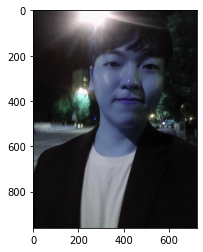

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

my_image_path = '/content/drive/MyDrive/코드 및 데이터파일/self.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

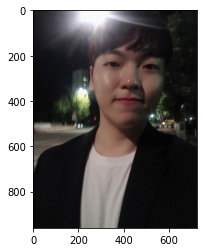

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 얼굴 및 랜드마크 검출하기

In [ ]:
detector_hog = dlib.get_frontal_face_detector()

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(247, 119) (632, 504)]]


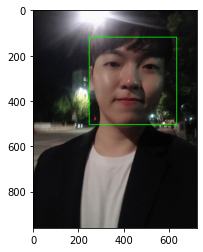

In [ ]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 랜드마크 검출

In [ ]:
import urllib.request
urllib.request.urlretrieve('http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2', 'shape_predictor_68_face_landmarks.dat.bz2')

import bz2,shutil

with bz2.BZ2File("shape_predictor_68_face_landmarks.dat.bz2") as fr, open("shape_predictor_68_face_landmarks.dat","wb") as fw:
    shutil.copyfileobj(fr,fw)

In [ ]:
model_path = 'shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


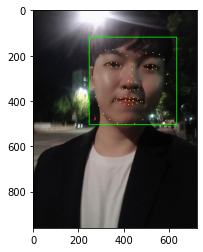

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(428, 353)
(x,y) : (433,316)
(w,h) : (386,386)


In [ ]:
sticker_path = '/content/drive/MyDrive/코드 및 데이터파일/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(386, 386, 3)


## 스티커 적용

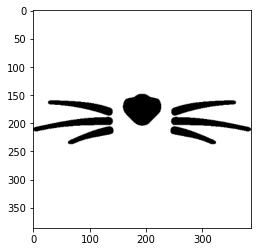

In [ ]:
plt.imshow(img_sticker)

In [ ]:
refined_x = x - int(w/2) # left
refined_y = y - int(h/2) # top
print("(x, y) : ({}, {})".format(refined_x, refined_y))

(x, y) : (240, 123)


In [ ]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

(386, 386, 3)


In [ ]:
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

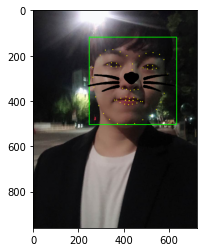

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

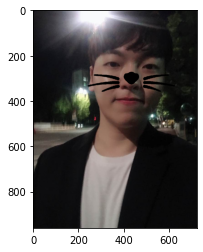

In [ ]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Summary

이번 프로젝트 같은 경우, 노드의 내용을 보면서 순조롭게 따라갈 수 있는 편이었다.  
그러나, 스티커의 위치를 맞추는 것이 조금 어려워서 여러번 값을 조정했다. face landmark의 위치가 한정적이라서 세밀한 조정을 하는 부분에 있어 불편함을 겪었다.

전반적인 내용 중에서 openCV의 BGR 이미지를 RGB로 변환해야 한다는 점을 다시한 번 상기했다. 여러가지 이미지들을 조합해보며 다방면으로 적용해 볼 수 있을 거 같다는 생각이 든다.
